# Задание 
**Нахождение параметров (значений коэффициентов) линейного дифференциального уравнения с постоянными коэффициентами при известных значениях в ряде точек.**

In [7]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def calculate_performance_metric(real_params, estimated_params):
    """
    Вычисляет метрику производительности для оценки качества подгонки.

    :param real_params: Истинные параметры модели.
    :param estimated_params: Оцененные параметры модели.
    :return: Значение метрики R квадрат.
    """
    average_value = np.mean(0.5 * (real_params + estimated_params))
    numerator = sum((real_params - estimated_params) ** 2)
    denominator = sum((real_params - average_value) ** 2)
    return 1 - numerator / denominator


def model_equation(y, t, coefficient1, coefficient2):
    """
    Определяет линейное дифференциальное уравнение.

    :param y: Значение функции в данный момент времени.
    :param t: Текущее время.
    :param coefficient1: Первый коэффициент уравнения.
    :param coefficient2: Второй коэффициент уравнения.
    :return: Производная функции по времени.
    """
    dydt = coefficient1 * y + coefficient2
    return dydt


def optimize_parameters(time_points, coefficient1, coefficient2):
    """
    Подгоняет параметры дифференциального уравнения к данным.

    :param time_points: Массив временных точек для подгонки.
    :param coefficient1: Начальное предположение для первого коэффициента.
    :param coefficient2: Начальное предположение для второго коэффициента.
    :return: Оптимизированные значения коэффициентов.
    """
    fitted_solution = odeint(model_equation, y0=1.0, t=time_points, args=(coefficient1, coefficient2))
    return fitted_solution.flatten()


def simulate_and_fit(time_series, actual_parameters, number_of_display_points, experiment_id):
    """
    Симулирует данные, выполняет оптимизацию параметров и отображает результаты.

    :param time_series: Временные точки для симуляции данных.
    :param actual_parameters: Истинные параметры модели.
    :param number_of_display_points: Количество точек для отображения на графике.
    :param experiment_id: Идентификатор эксперимента для вывода результатов.
    """
    # Симуляция данных с учетом шума
    np.random.seed(42)
    simulated_solution= odeint(model_equation, y0=1.0, t=time_series, args=tuple(actual_parameters)).flatten()
    noise = np.random.normal(0, np.abs(simulated_solution * 1.02 - simulated_solution), len(time_series))
    noisy_data = simulated_solution + noise
    # Начальное предположение для оптимизации
    initial_estimate = [1.0, 1.0]

    # Оптимизация параметров с шумом и без
    optimized_params_noisy, _ = curve_fit(optimize_parameters, time_series, noisy_data, p0=initial_estimate)
    optimized_params_clean, _ = curve_fit(optimize_parameters, time_series, simulated_solution, p0=initial_estimate)

    # Вывод результатов
    print(f"Эксперимент {experiment_id}:")
    print("Истинные параметры:", actual_parameters)
    print("Оптимизированные параметры (с шумом):", optimized_params_noisy)
    print("Оптимизированные параметры (без шума):", optimized_params_clean)
    performance_metric = calculate_performance_metric(actual_parameters, optimized_params_noisy)
    print("Метрика R^2:", performance_metric)

    # Визуализация результатов
    extended_time_series = np.linspace(time_series[0], time_series[-1], number_of_display_points)
    simulated_clean = odeint(model_equation, y0=1.0, t=extended_time_series, args=tuple(optimized_params_clean)).flatten()
    simulated_true = odeint(model_equation, y0=1.0, t=extended_time_series, args=tuple(actual_parameters)).flatten()

    plt.figure(figsize=(8, 6))
    plt.scatter(time_series, noisy_data, label='Симулированные данные с шумом')
    plt.scatter(time_series, simulated_solution, label='Входные данные', color='orange')
    plt.plot(extended_time_series, simulated_clean, label='Оптимизированные данные', color='red')
    plt.plot(extended_time_series, simulated_true, label='Истинные данные', color='green')
    plt.xlabel('Время')
    plt.ylabel('Значения')
    plt.title(f"Результаты эксперимента {experiment_id}")
    plt.legend()
    plt.show()

Эксперимент 1:
Истинные параметры: [-2, 8]
Оптимизированные параметры (с шумом): [-1.78377379  7.35501831]
Оптимизированные параметры (без шума): [-2.  8.]
Метрика R^2: 0.9907491484185106


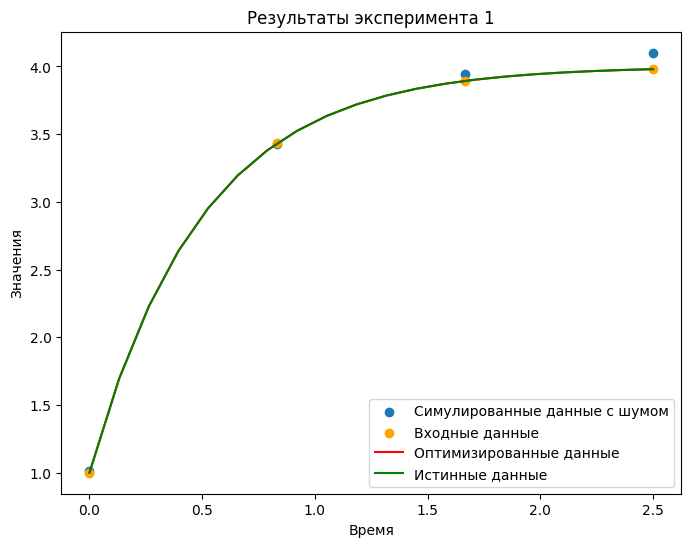

Эксперимент 2:
Истинные параметры: [-2, 8]
Оптимизированные параметры (с шумом): [-1.85523371  7.52444879]
Оптимизированные параметры (без шума): [-2.  8.]
Метрика R^2: 0.9950592269259939


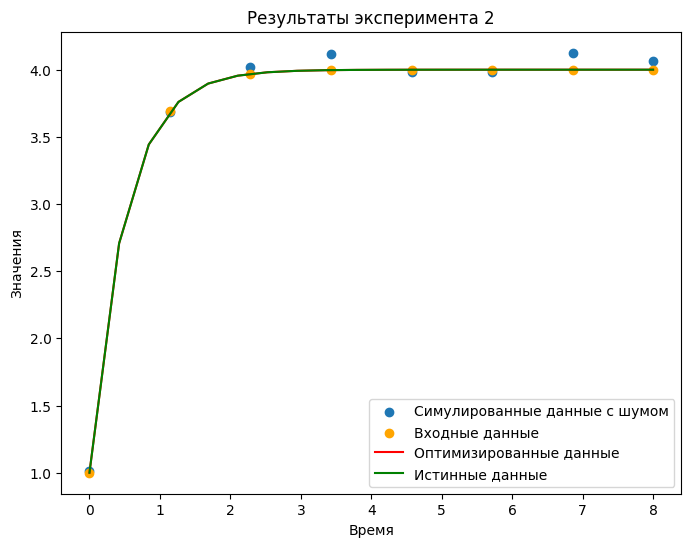

Эксперимент 3:
Истинные параметры: [-2, 8]
Оптимизированные параметры (с шумом): [-2.10824752  8.38956127]
Оптимизированные параметры (без шума): [-2.  8.]
Метрика R^2: 0.9967311365652959


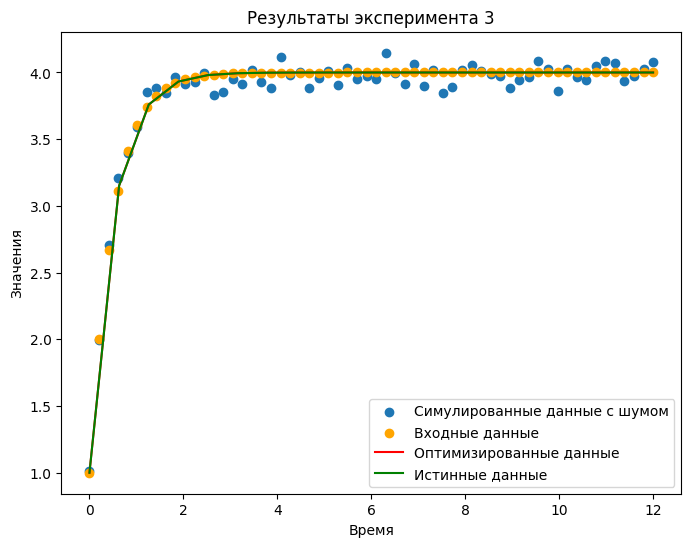

Эксперимент 4:
Истинные параметры: [3, -2]
Оптимизированные параметры (с шумом): [ 2.95496259 -1.83273608]
Оптимизированные параметры (без шума): [ 3. -2.]
Метрика R^2: 0.9975999114953472


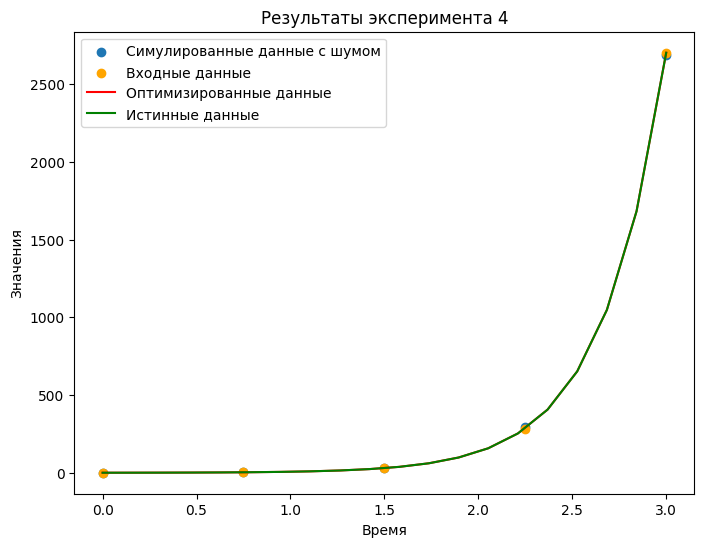

Эксперимент 5:
Истинные параметры: [3, -2]
Оптимизированные параметры (с шумом): [ 2.94510562 -1.85969773]
Оптимизированные параметры (без шума): [ 3. -2.]
Метрика R^2: 0.998184282970771


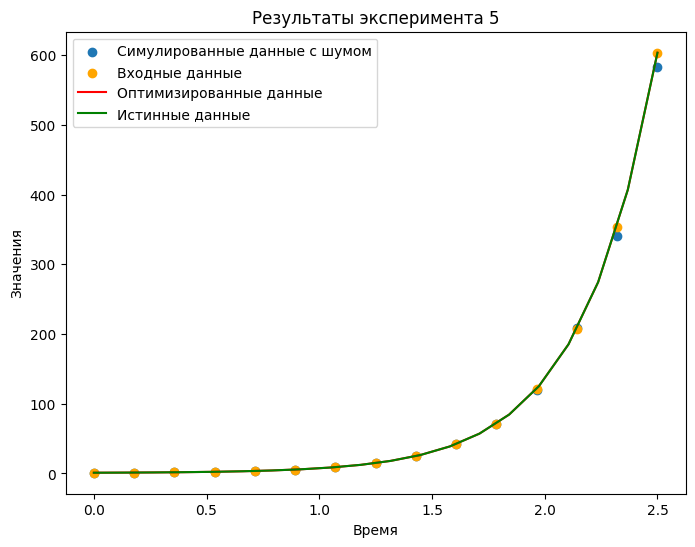

Эксперимент 6:
Истинные параметры: [3, -2]
Оптимизированные параметры (с шумом): [ 3.00809743 -2.02419512]
Оптимизированные параметры (без шума): [ 3. -2.]
Метрика R^2: 0.9999479223761711


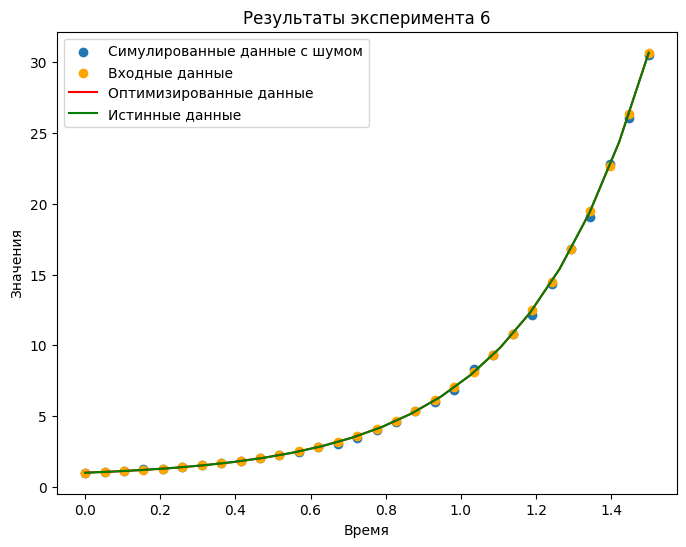

Эксперимент 7:
Истинные параметры: [4.5, 150]
Оптимизированные параметры (с шумом): [  4.49947593 149.50095203]
Оптимизированные параметры (без шума): [  4.5 150. ]
Метрика R^2: 0.999976471849411


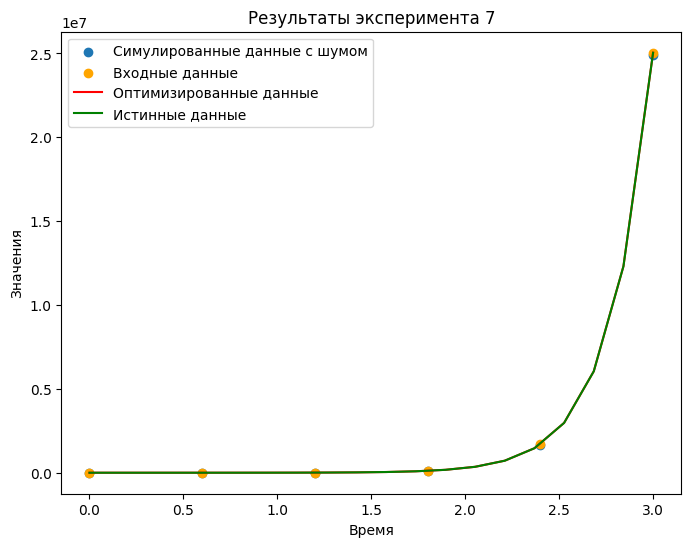

Эксперимент 8:
Истинные параметры: [4.5, 150]
Оптимизированные параметры (с шумом): [  4.43439844 170.04302189]
Оптимизированные параметры (без шума): [  4.5 150. ]
Метрика R^2: 0.9622259924394678


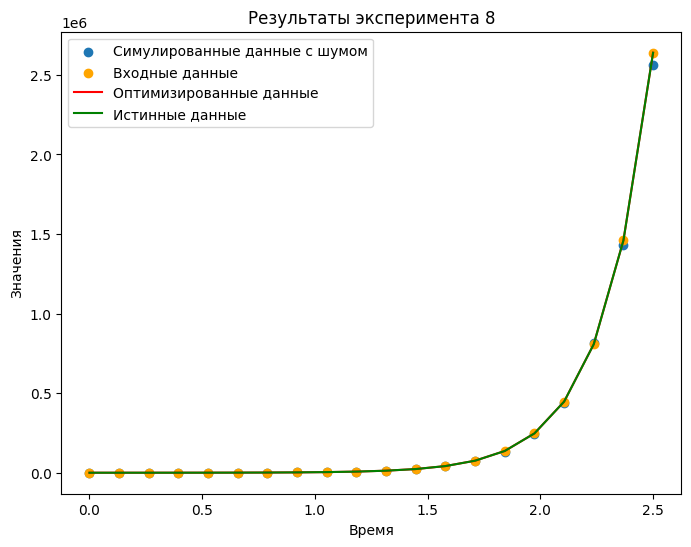

Эксперимент 9:
Истинные параметры: [4.5, 150]
Оптимизированные параметры (с шумом): [  4.3920218  200.86918019]
Оптимизированные параметры (без шума): [  4.5 150. ]
Метрика R^2: 0.7627546759663559


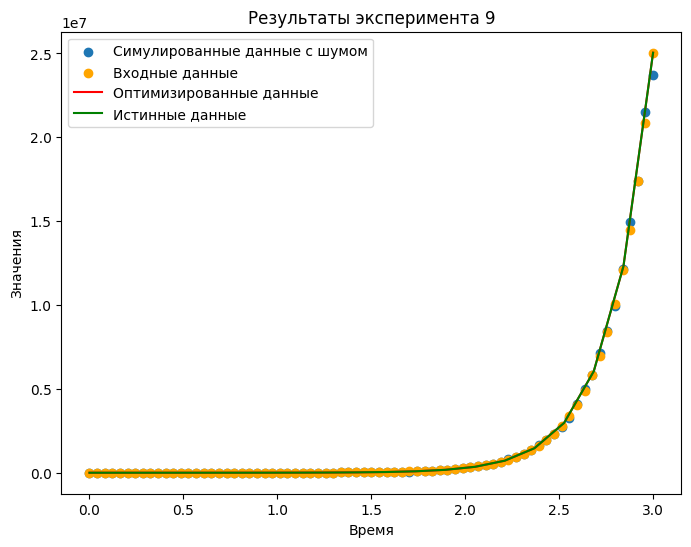

Эксперимент 10:
Истинные параметры: [6, -100]
Оптимизированные параметры (с шумом): [  -4.95060374 -447.48340528]
Оптимизированные параметры (без шума): [ -15.13105325 -492.09901756]
Метрика R^2: -4.575613989429367


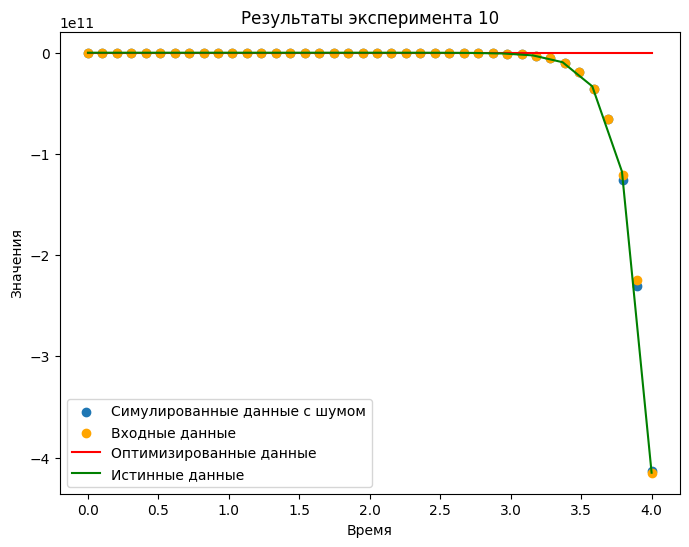

In [8]:
# Входные данные
display_points = 20

# Эксперимент 1
time_series = np.linspace(0, 2.5, 4, endpoint=True)  
parameters = [-2, 8]  
simulate_and_fit(time_series, parameters, display_points, 1)

# Эксперимент 2
time_series = np.linspace(0, 8, 8, endpoint=True)  
simulate_and_fit(time_series, parameters, display_points, 2)

# Эксперимент 3
time_series = np.linspace(0, 12, 60, endpoint=True)  
simulate_and_fit(time_series, parameters, display_points, 3)

# Эксперимент 4
time_series = np.linspace(0, 3, 5, endpoint=True)  
parameters = [3, -2]  
simulate_and_fit(time_series, parameters, display_points, 4)

# Эксперимент 5
time_series = np.linspace(0, 2.5, 15, endpoint=True)  
simulate_and_fit(time_series, parameters, display_points, 5)

# Эксперимент 6
time_series = np.linspace(0, 1.5, 30, endpoint=True)  
simulate_and_fit(time_series, parameters, display_points, 6)

# Эксперимент 7
time_series = np.linspace(0, 3, 6, endpoint=True)  
parameters = [4.5, 150]  
simulate_and_fit(time_series, parameters, display_points, 7)

# Эксперимент 8
time_series = np.linspace(0, 2.5, 20, endpoint=True)  
simulate_and_fit(time_series, parameters, display_points, 8)

# Эксперимент 9
time_series = np.linspace(0, 3, 75, endpoint=True) 
simulate_and_fit(time_series, parameters, display_points, 9)

#Эксперимент 10 
time_series = np.linspace(0, 4, 40, endpoint=True)
parameters = [6, -100]
simulate_and_fit(time_series, parameters, display_points, 10)

# Задание:
**NeuralODE. Нахождение параметров (значений коэффициентов) для системы дифференциальных уравнений с постоянными коэффициентами при известных значениях в ряде точек. Рассмотреть случай, когда известны наблюдения только одной функции из системы. Описать зависимость погрешности от максимума производной на отрезке для особой точки центр.**

Epoch 1/200
4/4 [==============================] - 0s 2ms/step - loss: 50.8457 - output_a_loss: 1.4553 - output_b_loss: 49.3904
Epoch 2/200
4/4 [==============================] - 0s 997us/step - loss: 35.7072 - output_a_loss: 1.3881 - output_b_loss: 34.3191
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 23.2586 - output_a_loss: 1.1164 - output_b_loss: 22.1422
Epoch 4/200
4/4 [==============================] - 0s 997us/step - loss: 13.1189 - output_a_loss: 0.6471 - output_b_loss: 12.4719
Epoch 5/200
4/4 [==============================] - 0s 997us/step - loss: 5.5730 - output_a_loss: 0.1512 - output_b_loss: 5.4217
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 1.2467 - output_a_loss: 0.0445 - output_b_loss: 1.2021
Epoch 7/200
4/4 [==============================] - 0s 997us/step - loss: 0.6309 - output_a_loss: 0.2605 - output_b_loss: 0.3704
Epoch 8/200
4/4 [==============================] - 0s 997us/step - loss: 1.6708 - output_a_loss: 0.293

4/4 [==============================] - 0s 997us/step - loss: 0.2104 - output_a_loss: 0.0120 - output_b_loss: 0.1984
Epoch 128/200
4/4 [==============================] - 0s 997us/step - loss: 0.2097 - output_a_loss: 0.0117 - output_b_loss: 0.1980
Epoch 129/200
4/4 [==============================] - 0s 997us/step - loss: 0.2089 - output_a_loss: 0.0117 - output_b_loss: 0.1972
Epoch 130/200
4/4 [==============================] - 0s 997us/step - loss: 0.2122 - output_a_loss: 0.0124 - output_b_loss: 0.1998
Epoch 131/200
4/4 [==============================] - 0s 997us/step - loss: 0.2212 - output_a_loss: 0.0124 - output_b_loss: 0.2089
Epoch 132/200
4/4 [==============================] - 0s 1ms/step - loss: 0.2131 - output_a_loss: 0.0121 - output_b_loss: 0.2010
Epoch 133/200
4/4 [==============================] - 0s 997us/step - loss: 0.2121 - output_a_loss: 0.0124 - output_b_loss: 0.1997
Epoch 134/200
4/4 [==============================] - 0s 997us/step - loss: 0.2139 - output_a_loss: 0.0123 

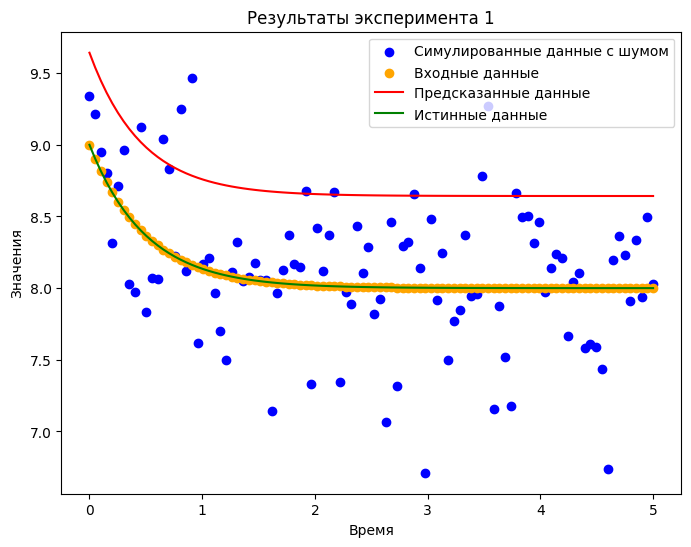

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Определение модели NeuralODE для предсказания параметров a и b
def build_neural_ode_model():
    input_y = Input(shape=(1,))
    input_t = Input(shape=(1,))
    
    # Объединение входных данных
    combined_input = Concatenate()([input_y, input_t])
    
    x = Dense(units=64, activation='relu')(combined_input)
    x = Dense(units=64, activation='relu')(x)
    x = Dense(units=64, activation='relu')(x)
    
    # Два выхода для параметров a и b
    output_a = Dense(units=1, name='output_a')(x)
    output_b = Dense(units=1, name='output_b')(x)
    
    model = Model(inputs=[input_y, input_t], outputs=[output_a, output_b])
    return model

neural_ode_model = build_neural_ode_model()
neural_ode_model.compile(optimizer='adam', loss='mse')

# Генерация симулированных данных
time_points = np.linspace(0, 5, 100)  # временные точки
actual_parameters = [-2, 8]  # истинные параметры a и b
y0 = 1.0  # начальное условие

# Решение уравнения
true_solution = y0 * np.exp(actual_parameters[0] * time_points) + actual_parameters[1]

# Добавление шума к данным
noise = np.random.normal(0, 0.5, true_solution.shape)
noisy_data = true_solution + noise

# Подготовка данных для обучения
X_train = [noisy_data.reshape(-1, 1), time_points.reshape(-1, 1)]
y_train = [np.full_like(noisy_data, actual_parameters[0]).reshape(-1, 1), 
           np.full_like(noisy_data, actual_parameters[1]).reshape(-1, 1)]

# Обучение модели
history = neural_ode_model.fit(X_train, y_train, epochs=200, verbose=1)

# Предсказание параметров
predicted_params = neural_ode_model.predict(X_train)

# Вывод предсказанных параметров
predicted_a = predicted_params[0].flatten()[0]
predicted_b = predicted_params[1].flatten()[0]

# Предсказание параметров на основе истинных данных (как "данные без шума")
predicted_params_clean = neural_ode_model.predict([true_solution.reshape(-1, 1), time_points.reshape(-1, 1)])
predicted_a_clean = predicted_params_clean[0].flatten()[0]
predicted_b_clean = predicted_params_clean[1].flatten()[0]

# Функция для расчета MSE
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Создание предсказанного решения на основе предсказанных параметров
predicted_solution = y0 * np.exp(predicted_a * time_points) + predicted_b

# Расчёт MSE для предсказанных параметров
mse = calculate_mse(true_solution, predicted_solution)

# Вывод результатов
experiment_id = 1
print(f"Эксперимент {experiment_id}:")
print("Истинные параметры:", actual_parameters)
print("Предсказанные параметры (с шумом):", [predicted_a, predicted_b])
print("Предсказанные параметры (без шума):", [predicted_a_clean, predicted_b_clean])
print("MSE:", mse)

# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(time_points, noisy_data, label='Симулированные данные с шумом', color='blue')
plt.scatter(time_points, true_solution, label='Входные данные', color='orange')
plt.plot(time_points, predicted_solution, label='Предсказанные данные', color='red')
plt.plot(time_points, true_solution, label='Истинные данные', color='green')
plt.xlabel('Время')
plt.ylabel('Значения')
plt.title(f"Результаты эксперимента {experiment_id}")
plt.legend()
plt.show()

Epoch 1/200
4/4 [==============================] - 0s 1ms/step - loss: 0.1518
Epoch 2/200
4/4 [==============================] - 0s 1000us/step - loss: 0.0746
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0557
Epoch 4/200
4/4 [==============================] - 0s 667us/step - loss: 0.0352
Epoch 5/200
4/4 [==============================] - 0s 667us/step - loss: 0.0276
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0225
Epoch 7/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 9/200
4/4 [==============================] - 0s 667us/step - loss: 0.0148
Epoch 10/200
4/4 [==============================] - 0s 667us/step - loss: 0.0131
Epoch 11/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0136
Epoch 12/200
4/4 [==============================] - 0s 667us/step - loss: 0.0116
Epoch 13/200
4/4 [==============================

4/4 [==============================] - 0s 1000us/step - loss: 0.0015
Epoch 104/200
4/4 [==============================] - 0s 667us/step - loss: 0.0012
Epoch 105/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 106/200
4/4 [==============================] - 0s 667us/step - loss: 0.0011
Epoch 107/200
4/4 [==============================] - 0s 1000us/step - loss: 0.0012
Epoch 108/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 109/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 110/200
4/4 [==============================] - 0s 667us/step - loss: 0.0011
Epoch 111/200
4/4 [==============================] - 0s 667us/step - loss: 0.0011
Epoch 112/200
4/4 [==============================] - 0s 666us/step - loss: 0.0015
Epoch 113/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 114/200
4/4 [==============================] - 0s 667us/step - loss: 0.0010
Epoch 115/200
4/4 [=================

4/4 [==============================] - 0s 667us/step - loss: 2.1140e-04
Epoch 200/200
4/4 [==============================] - 0s 667us/step
Эксперимент 1:
Истинные параметры: [-2, 1, 3, -4]


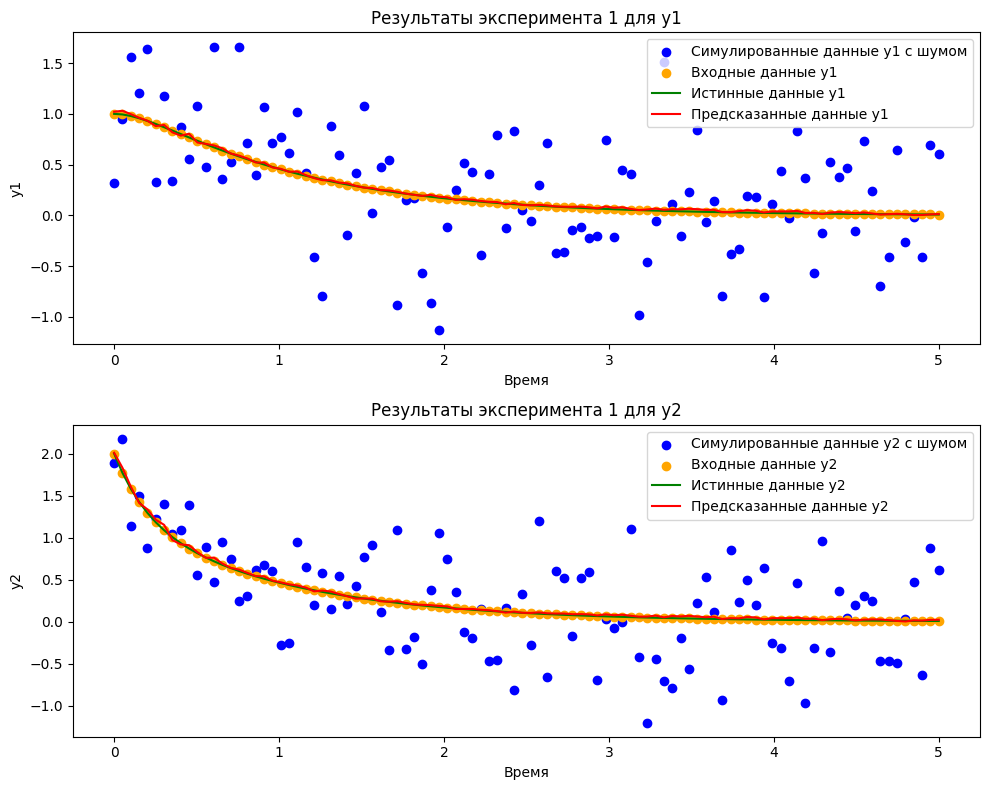

MSE: 0.000265569597129423
Epoch 1/200
4/4 [==============================] - 0s 1ms/step - loss: 20567256.0000
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 21598334.0000
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 4722862.0000
Epoch 4/200
4/4 [==============================] - 0s 1000us/step - loss: 8144889.5000
Epoch 5/200
4/4 [==============================] - 0s 1ms/step - loss: 2710106.2500
Epoch 6/200
4/4 [==============================] - 0s 667us/step - loss: 1913460.6250
Epoch 7/200
4/4 [==============================] - 0s 667us/step - loss: 555675.6875
Epoch 8/200
4/4 [==============================] - 0s 1000us/step - loss: 1535608.0000
Epoch 9/200
4/4 [==============================] - 0s 667us/step - loss: 197267.4219
Epoch 10/200
4/4 [==============================] - 0s 1ms/step - loss: 562948.6250
Epoch 11/200
4/4 [==============================] - 0s 1ms/step - loss: 176114.0469
Epoch 12/200
4/4 [====================

Epoch 100/200
4/4 [==============================] - 0s 1ms/step - loss: 13.0390
Epoch 101/200
4/4 [==============================] - 0s 1000us/step - loss: 13.5610
Epoch 102/200
4/4 [==============================] - 0s 667us/step - loss: 13.7276
Epoch 103/200
4/4 [==============================] - 0s 1ms/step - loss: 13.4802
Epoch 104/200
4/4 [==============================] - 0s 667us/step - loss: 14.4312
Epoch 105/200
4/4 [==============================] - 0s 1ms/step - loss: 16.0111
Epoch 106/200
4/4 [==============================] - 0s 1ms/step - loss: 13.0535
Epoch 107/200
4/4 [==============================] - 0s 667us/step - loss: 16.4343
Epoch 108/200
4/4 [==============================] - 0s 1000us/step - loss: 14.8165
Epoch 109/200
4/4 [==============================] - 0s 667us/step - loss: 13.2967
Epoch 110/200
4/4 [==============================] - 0s 1ms/step - loss: 12.8993
Epoch 111/200
4/4 [==============================] - 0s 667us/step - loss: 13.8642
Epoch 112/20

4/4 [==============================] - 0s 667us/step - loss: 13.2867
Epoch 200/200
4/4 [==============================] - 0s 667us/step
Эксперимент 2:
Истинные параметры: [-1, 2, -3, 4]


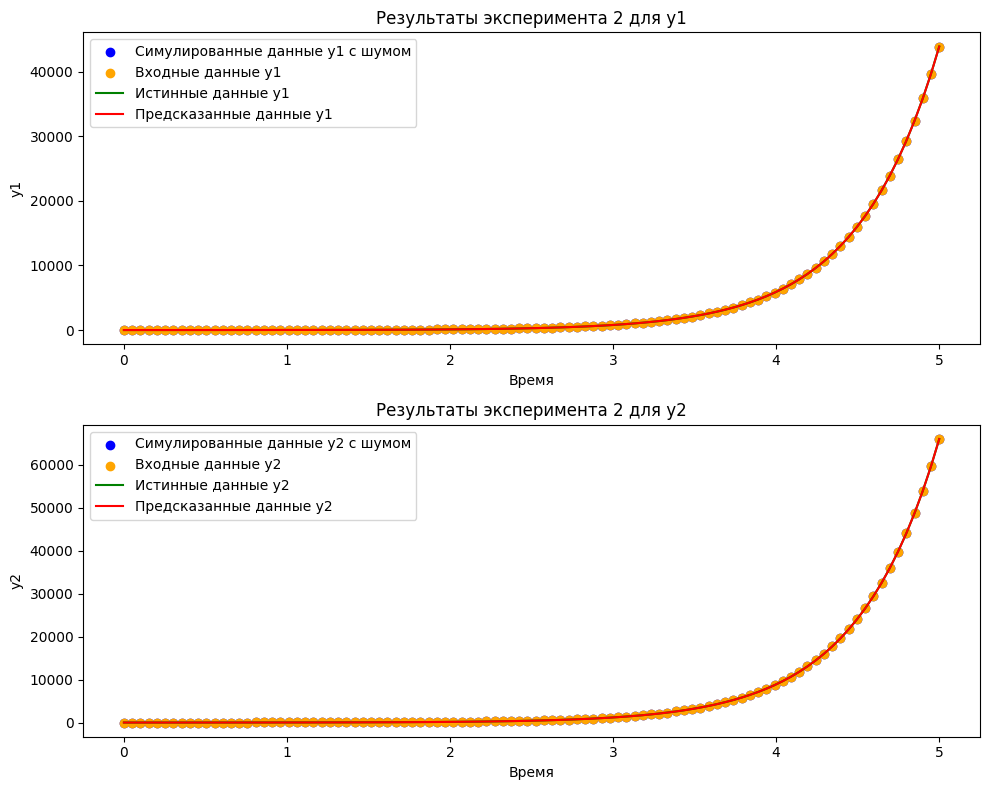

MSE: 12.796509317602721
Epoch 1/200
4/4 [==============================] - 0s 1000us/step - loss: 0.4080
Epoch 2/200
4/4 [==============================] - 0s 667us/step - loss: 0.0997
Epoch 3/200
4/4 [==============================] - 0s 1000us/step - loss: 0.1006
Epoch 4/200
4/4 [==============================] - 0s 667us/step - loss: 0.0456
Epoch 5/200
4/4 [==============================] - 0s 666us/step - loss: 0.0297
Epoch 6/200
4/4 [==============================] - 0s 1000us/step - loss: 0.0263
Epoch 7/200
4/4 [==============================] - 0s 667us/step - loss: 0.0199
Epoch 8/200
4/4 [==============================] - 0s 667us/step - loss: 0.0191
Epoch 9/200
4/4 [==============================] - 0s 666us/step - loss: 0.0171
Epoch 10/200
4/4 [==============================] - 0s 667us/step - loss: 0.0180
Epoch 11/200
4/4 [==============================] - 0s 667us/step - loss: 0.0159
Epoch 12/200
4/4 [==============================] - 0s 667us/step - loss: 0.0151
Epoch 13/2

4/4 [==============================] - 0s 1ms/step - loss: 5.2929e-04
Epoch 101/200
4/4 [==============================] - 0s 1000us/step - loss: 5.2548e-04
Epoch 102/200
4/4 [==============================] - 0s 667us/step - loss: 5.1009e-04
Epoch 103/200
4/4 [==============================] - 0s 1ms/step - loss: 5.6456e-04
Epoch 104/200
4/4 [==============================] - 0s 667us/step - loss: 4.4692e-04
Epoch 105/200
4/4 [==============================] - 0s 1000us/step - loss: 4.3954e-04
Epoch 106/200
4/4 [==============================] - 0s 667us/step - loss: 4.3412e-04
Epoch 107/200
4/4 [==============================] - 0s 1000us/step - loss: 4.1356e-04
Epoch 108/200
4/4 [==============================] - 0s 667us/step - loss: 4.1377e-04
Epoch 109/200
4/4 [==============================] - 0s 1000us/step - loss: 4.0967e-04
Epoch 110/200
4/4 [==============================] - 0s 1000us/step - loss: 3.9739e-04
Epoch 111/200
4/4 [==============================] - 0s 667us/step 

Epoch 196/200
4/4 [==============================] - 0s 1ms/step - loss: 2.8300e-04
Epoch 197/200
4/4 [==============================] - 0s 667us/step - loss: 2.3560e-04
Epoch 198/200
4/4 [==============================] - 0s 1ms/step - loss: 2.1626e-04
Epoch 199/200
4/4 [==============================] - 0s 1ms/step - loss: 2.0315e-04
Epoch 200/200
4/4 [==============================] - 0s 667us/step
Эксперимент 3:
Истинные параметры: [0.5, -1.5, 2, -2.5]


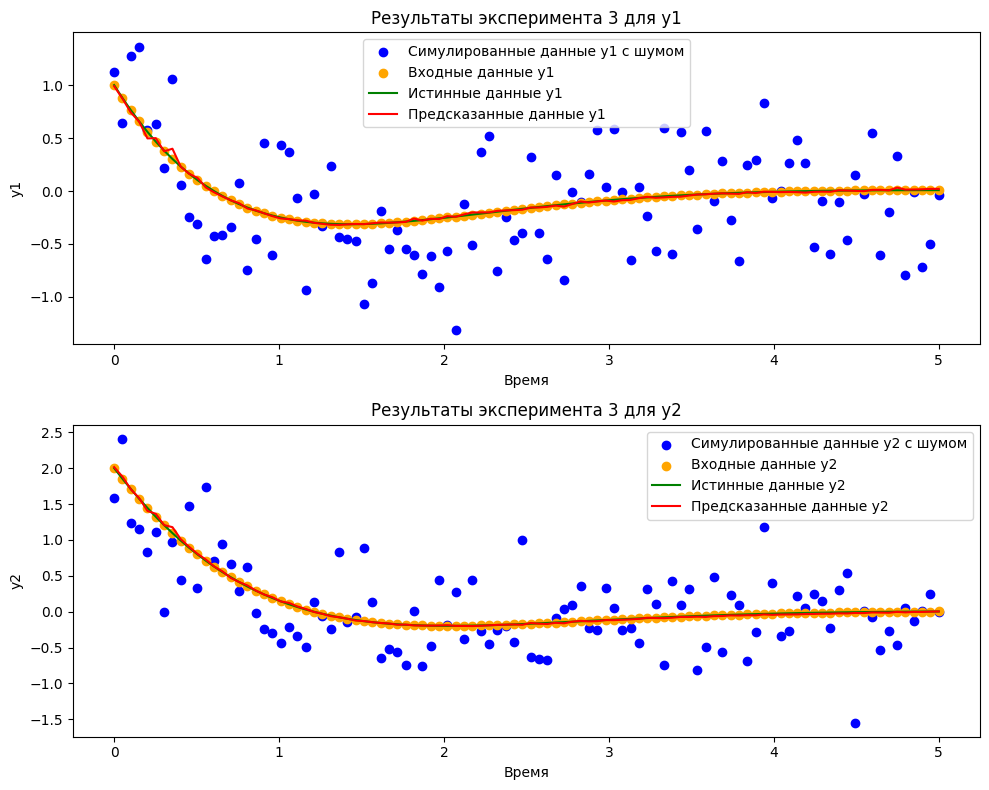

MSE: 0.00020414279322896817
Epoch 1/200
4/4 [==============================] - 0s 1000us/step - loss: 0.1545
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0606
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0229
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0269
Epoch 5/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 6/200
4/4 [==============================] - 0s 667us/step - loss: 0.0125
Epoch 7/200
4/4 [==============================] - 0s 667us/step - loss: 0.0051
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 9/200
4/4 [==============================] - 0s 667us/step - loss: 0.0047
Epoch 10/200
4/4 [==============================] - 0s 1000us/step - loss: 0.0037
Epoch 11/200
4/4 [==============================] - 0s 1000us/step - loss: 0.0032
Epoch 12/200
4/4 [==============================] - 0s 667us/step - loss: 0.0024
Epoch 13/200
4/4

4/4 [==============================] - 0s 1ms/step - loss: 2.2025e-04
Epoch 100/200
4/4 [==============================] - 0s 667us/step - loss: 2.0643e-04
Epoch 101/200
4/4 [==============================] - 0s 667us/step - loss: 2.0708e-04
Epoch 102/200
4/4 [==============================] - 0s 667us/step - loss: 2.2616e-04
Epoch 103/200
4/4 [==============================] - 0s 667us/step - loss: 2.6325e-04
Epoch 104/200
4/4 [==============================] - 0s 1ms/step - loss: 2.7973e-04
Epoch 105/200
4/4 [==============================] - 0s 667us/step - loss: 2.1625e-04
Epoch 106/200
4/4 [==============================] - 0s 1000us/step - loss: 2.4658e-04
Epoch 107/200
4/4 [==============================] - 0s 667us/step - loss: 2.3060e-04
Epoch 108/200
4/4 [==============================] - 0s 1ms/step - loss: 2.2101e-04
Epoch 109/200
4/4 [==============================] - 0s 1ms/step - loss: 2.0525e-04
Epoch 110/200
4/4 [==============================] - 0s 667us/step - loss: 

4/4 [==============================] - 0s 1ms/step - loss: 1.1423e-04
Epoch 195/200
4/4 [==============================] - 0s 667us/step - loss: 1.0726e-04
Epoch 196/200
4/4 [==============================] - 0s 1ms/step - loss: 1.3540e-04
Epoch 197/200
4/4 [==============================] - 0s 667us/step - loss: 1.0743e-04
Epoch 198/200
4/4 [==============================] - 0s 1ms/step - loss: 1.2343e-04
Epoch 199/200
4/4 [==============================] - 0s 1ms/step - loss: 1.0155e-04
Epoch 200/200
4/4 [==============================] - 0s 667us/step
Эксперимент 4:
Истинные параметры: [1, -1, 1.5, -1.5]


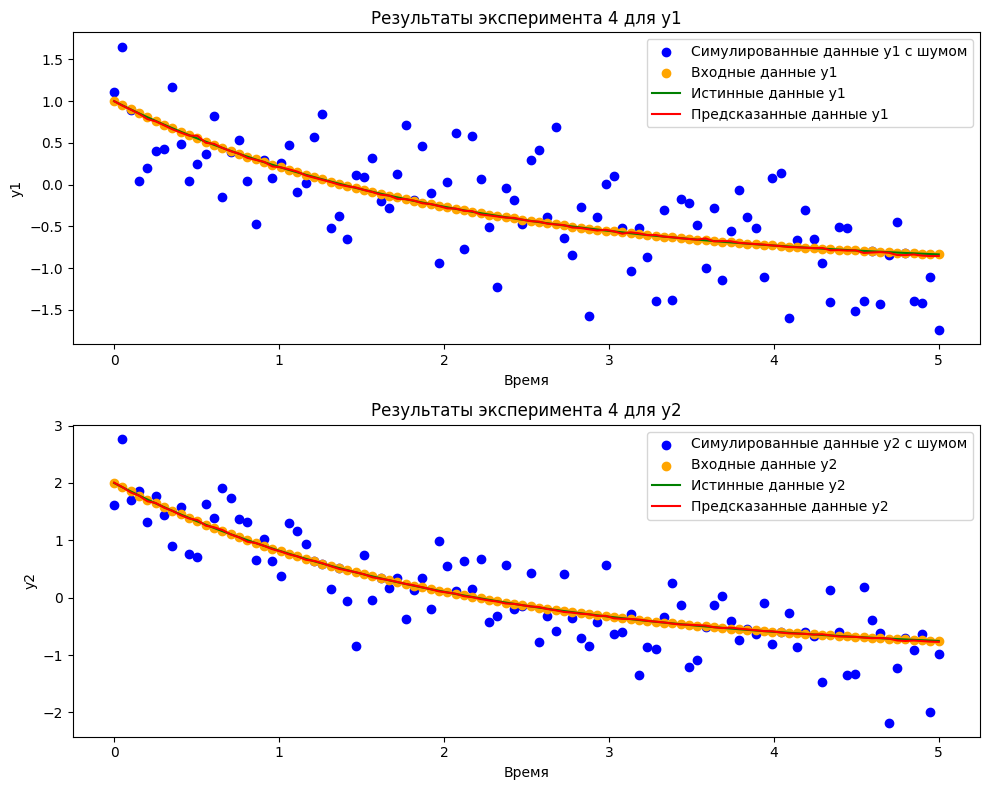

MSE: 0.00010635123899428938
Epoch 1/200
4/4 [==============================] - 0s 1ms/step - loss: 3.9201
Epoch 2/200
4/4 [==============================] - 0s 1000us/step - loss: 1.0988
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 0.2841
Epoch 4/200
4/4 [==============================] - 0s 667us/step - loss: 0.2718
Epoch 5/200
4/4 [==============================] - 0s 667us/step - loss: 0.1885
Epoch 6/200
4/4 [==============================] - 0s 667us/step - loss: 0.1151
Epoch 7/200
4/4 [==============================] - 0s 666us/step - loss: 0.1087
Epoch 8/200
4/4 [==============================] - 0s 1000us/step - loss: 0.1086
Epoch 9/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0905
Epoch 10/200
4/4 [==============================] - 0s 667us/step - loss: 0.0669
Epoch 11/200
4/4 [==============================] - 0s 667us/step - loss: 0.0648
Epoch 12/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0573
Epoch 13/200
4/

4/4 [==============================] - 0s 1000us/step - loss: 0.0061
Epoch 103/200
4/4 [==============================] - 0s 667us/step - loss: 0.0059
Epoch 104/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0060
Epoch 105/200
4/4 [==============================] - 0s 667us/step - loss: 0.0059
Epoch 106/200
4/4 [==============================] - 0s 667us/step - loss: 0.0058
Epoch 107/200
4/4 [==============================] - 0s 667us/step - loss: 0.0058
Epoch 108/200
4/4 [==============================] - 0s 667us/step - loss: 0.0057
Epoch 109/200
4/4 [==============================] - 0s 667us/step - loss: 0.0056
Epoch 110/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 111/200
4/4 [==============================] - 0s 667us/step - loss: 0.0056
Epoch 112/200
4/4 [==============================] - 0s 667us/step - loss: 0.0056
Epoch 113/200
4/4 [==============================] - 0s 667us/step - loss: 0.0056
Epoch 114/200
4/4 [==============

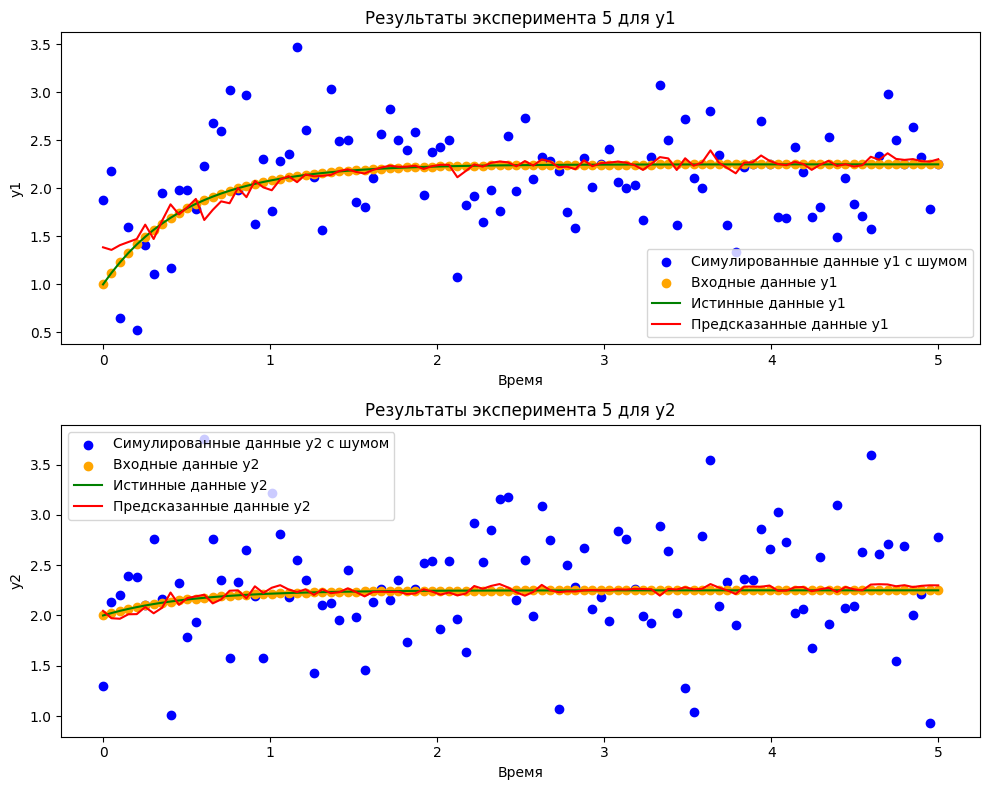

MSE: 0.0035602160197622424
Epoch 1/200
4/4 [==============================] - 0s 1ms/step - loss: 4.5644
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 1.4338
Epoch 3/200
4/4 [==============================] - 0s 1000us/step - loss: 0.3484
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 0.2015
Epoch 5/200
4/4 [==============================] - 0s 1000us/step - loss: 0.1573
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0826
Epoch 7/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0654
Epoch 8/200
4/4 [==============================] - 0s 1000us/step - loss: 0.0550
Epoch 9/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0444
Epoch 10/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0404
Epoch 11/200
4/4 [==============================] - 0s 1000us/step - loss: 0.0369
Epoch 12/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0323
Epoch 13/200
4/4 [====

4/4 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 104/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 105/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 106/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 107/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 108/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 109/200
4/4 [==============================] - 0s 1000us/step - loss: 0.0033
Epoch 110/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 111/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 112/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 113/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 114/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 115/200
4/4 [==============================] 

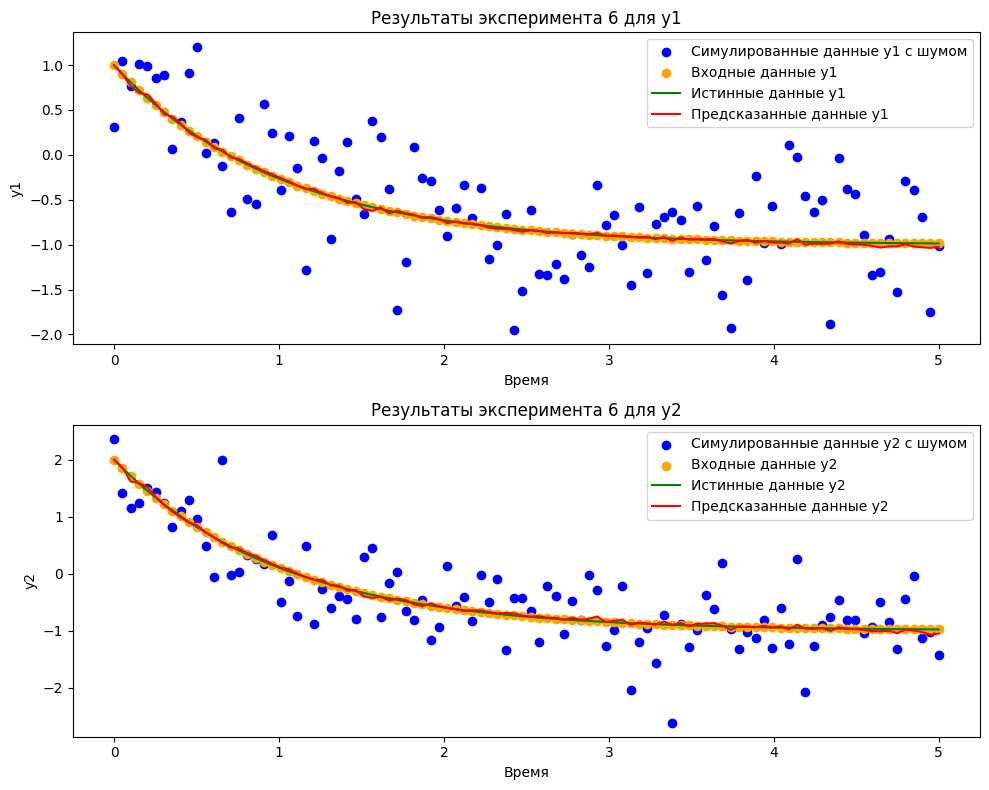

MSE: 0.0007263420551353125
Epoch 1/200
4/4 [==============================] - 0s 2ms/step - loss: 1.8372
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 0.8795
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 0.2838
Epoch 4/200
4/4 [==============================] - 0s 1000us/step - loss: 0.1035
Epoch 5/200
4/4 [==============================] - 0s 1ms/step - loss: 0.1063
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0984
Epoch 7/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0664
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0457
Epoch 9/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0428
Epoch 10/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0411
Epoch 11/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0333
Epoch 12/200
4/4 [==============================] - 0s 1000us/step - loss: 0.0257
Epoch 13/200
4/4 [==========

4/4 [==============================] - 0s 1000us/step - loss: 6.3509e-04
Epoch 103/200
4/4 [==============================] - 0s 1ms/step - loss: 5.6715e-04
Epoch 104/200
4/4 [==============================] - 0s 1ms/step - loss: 6.7218e-04
Epoch 105/200
4/4 [==============================] - 0s 1ms/step - loss: 6.0754e-04
Epoch 106/200
4/4 [==============================] - 0s 1ms/step - loss: 5.9577e-04
Epoch 107/200
4/4 [==============================] - 0s 1ms/step - loss: 5.9513e-04
Epoch 108/200
4/4 [==============================] - 0s 1ms/step - loss: 5.5934e-04
Epoch 109/200
4/4 [==============================] - 0s 1ms/step - loss: 5.8182e-04
Epoch 110/200
4/4 [==============================] - 0s 1ms/step - loss: 5.4572e-04
Epoch 111/200
4/4 [==============================] - 0s 1ms/step - loss: 5.3498e-04
Epoch 112/200
4/4 [==============================] - 0s 1ms/step - loss: 5.3532e-04
Epoch 113/200
4/4 [==============================] - 0s 1000us/step - loss: 5.6132e-04


4/4 [==============================] - 0s 1ms/step - loss: 2.8292e-04
Epoch 200/200
4/4 [==============================] - 0s 1000us/step
Эксперимент 7:
Истинные параметры: [-1.5, 1, 2.5, -2]


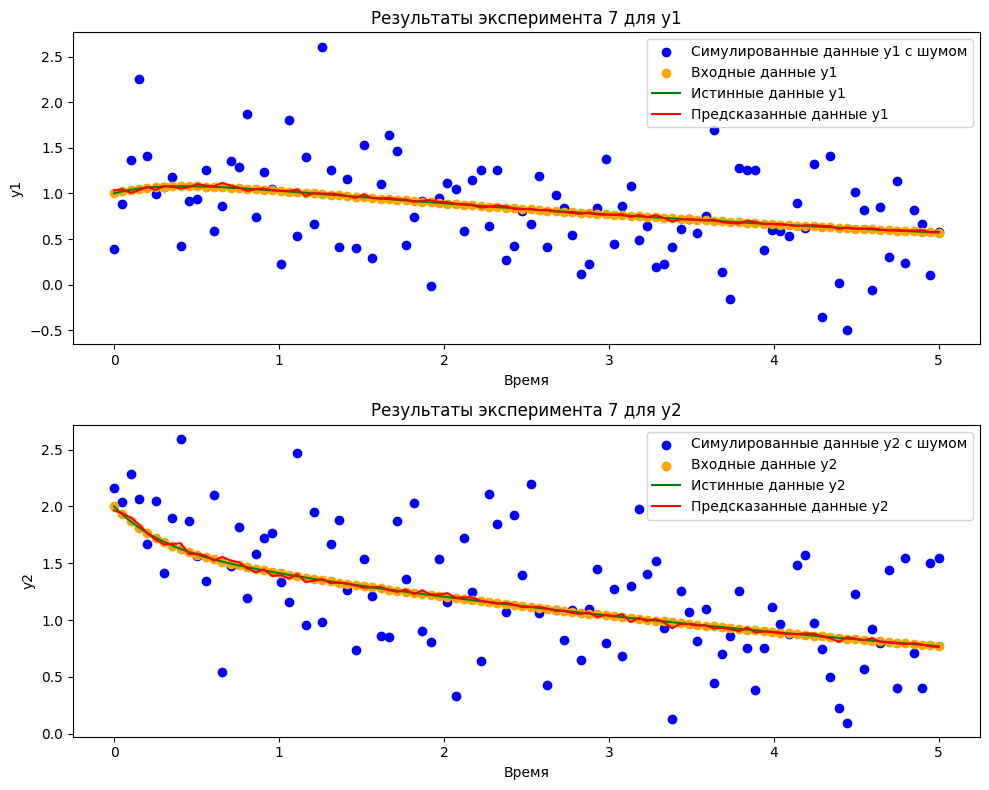

MSE: 0.00026725371134624597
Epoch 1/200
4/4 [==============================] - 0s 1ms/step - loss: 191850184704.0000
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 7488077824.0000
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 64588267520.0000
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 10862986240.0000
Epoch 5/200
4/4 [==============================] - 0s 1ms/step - loss: 6102619136.0000
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 4465825792.0000
Epoch 7/200
4/4 [==============================] - 0s 1000us/step - loss: 485238784.0000
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 733843456.0000
Epoch 9/200
4/4 [==============================] - 0s 1ms/step - loss: 242520528.0000
Epoch 10/200
4/4 [==============================] - 0s 1ms/step - loss: 152382000.0000
Epoch 11/200
4/4 [==============================] - 0s 1ms/step - loss: 291337024.0000
Epoch 12/20

4/4 [==============================] - 0s 1ms/step - loss: 31.4419
Epoch 100/200
4/4 [==============================] - 0s 1ms/step - loss: 28.6418
Epoch 101/200
4/4 [==============================] - 0s 1ms/step - loss: 23.2554
Epoch 102/200
4/4 [==============================] - 0s 1ms/step - loss: 15.5344
Epoch 103/200
4/4 [==============================] - 0s 1ms/step - loss: 14.0276
Epoch 104/200
4/4 [==============================] - 0s 1ms/step - loss: 11.1465
Epoch 105/200
4/4 [==============================] - 0s 1ms/step - loss: 15.4617
Epoch 106/200
4/4 [==============================] - 0s 1000us/step - loss: 9.9057
Epoch 107/200
4/4 [==============================] - 0s 1ms/step - loss: 10.5990
Epoch 108/200
4/4 [==============================] - 0s 1ms/step - loss: 12.4145
Epoch 109/200
4/4 [==============================] - 0s 1ms/step - loss: 11.4219
Epoch 110/200
4/4 [==============================] - 0s 1ms/step - loss: 9.9664
Epoch 111/200
4/4 [======================

4/4 [==============================] - 0s 667us/step
Эксперимент 8:
Истинные параметры: [1.5, -1, -2, 2]


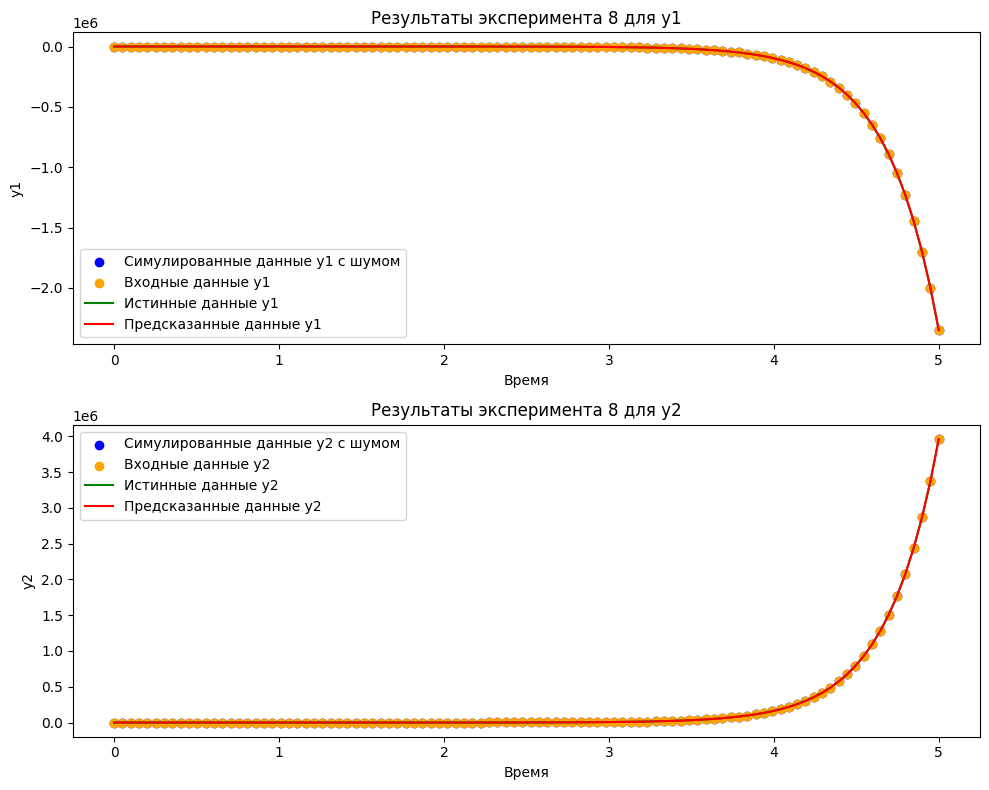

MSE: 9.849165921115867
Epoch 1/200
4/4 [==============================] - 0s 1ms/step - loss: 0.8161
Epoch 2/200
4/4 [==============================] - 0s 1000us/step - loss: 0.4636
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 0.2949
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 0.2169
Epoch 5/200
4/4 [==============================] - 0s 1ms/step - loss: 0.1634
Epoch 6/200
4/4 [==============================] - 0s 1000us/step - loss: 0.1478
Epoch 7/200
4/4 [==============================] - 0s 1000us/step - loss: 0.1459
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 0.1335
Epoch 9/200
4/4 [==============================] - 0s 1000us/step - loss: 0.1153
Epoch 10/200
4/4 [==============================] - 0s 1000us/step - loss: 0.1066
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1018
Epoch 12/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0928
Epoch 13/200
4/4 [=====

4/4 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 104/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 105/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 106/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 107/200
4/4 [==============================] - 0s 1000us/step - loss: 0.0085
Epoch 108/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 109/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 110/200
4/4 [==============================] - 0s 1000us/step - loss: 0.0081
Epoch 111/200
4/4 [==============================] - 0s 1000us/step - loss: 0.0078
Epoch 112/200
4/4 [==============================] - 0s 1000us/step - loss: 0.0077
Epoch 113/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 114/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 115/200
4/4 [=======================

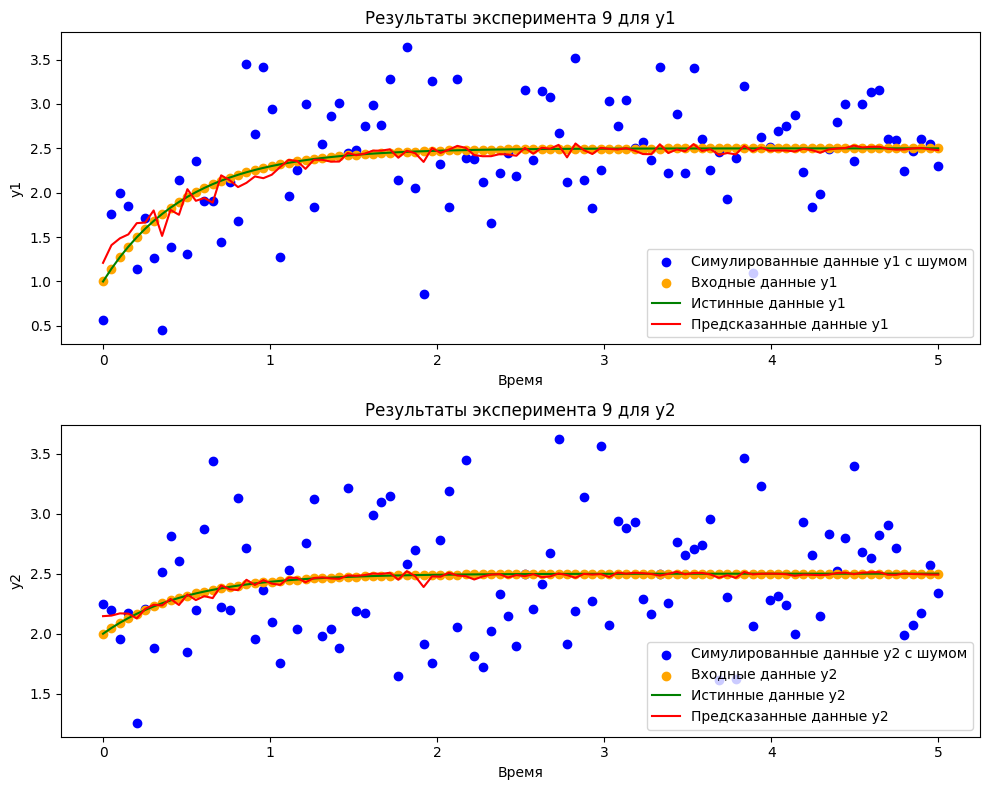

MSE: 0.003338309319773118
Epoch 1/200
4/4 [==============================] - 0s 1ms/step - loss: 21615992.0000
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 10103401.0000
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 1888001.2500
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 352036.1562
Epoch 5/200
4/4 [==============================] - 0s 1ms/step - loss: 1718520.6250
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 782373.5000
Epoch 7/200
4/4 [==============================] - 0s 1ms/step - loss: 49766.5039
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 161707.0469
Epoch 9/200
4/4 [==============================] - 0s 1ms/step - loss: 343403.3750
Epoch 10/200
4/4 [==============================] - 0s 1ms/step - loss: 233603.8125
Epoch 11/200
4/4 [==============================] - 0s 1ms/step - loss: 58521.1602
Epoch 12/200
4/4 [==============================] - 0s 

4/4 [==============================] - 0s 1ms/step - loss: 0.7892
Epoch 103/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7890
Epoch 104/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7944
Epoch 105/200
4/4 [==============================] - 0s 1ms/step - loss: 0.9101
Epoch 106/200
4/4 [==============================] - 0s 1ms/step - loss: 0.9506
Epoch 107/200
4/4 [==============================] - 0s 1ms/step - loss: 0.8424
Epoch 108/200
4/4 [==============================] - 0s 1ms/step - loss: 0.9115
Epoch 109/200
4/4 [==============================] - 0s 1ms/step - loss: 0.8062
Epoch 110/200
4/4 [==============================] - 0s 1ms/step - loss: 0.8141
Epoch 111/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7960
Epoch 112/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7783
Epoch 113/200
4/4 [==============================] - 0s 1ms/step - loss: 0.8077
Epoch 114/200
4/4 [==============================] - 0

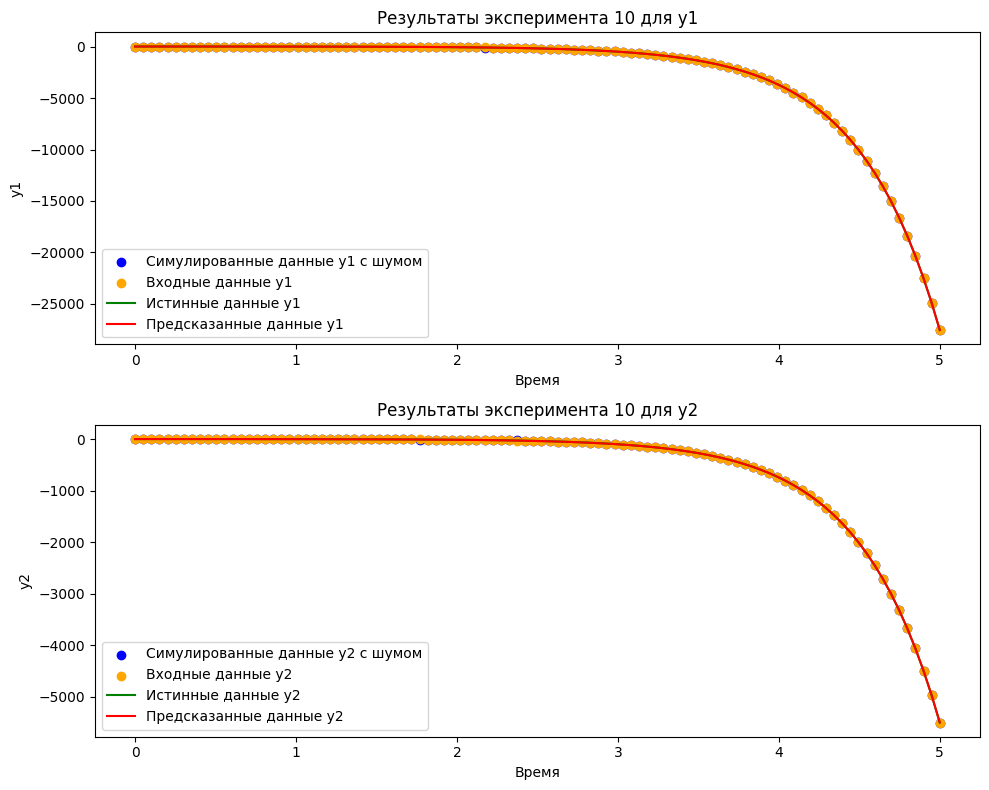

MSE: 0.7488704656184598
Длина max_derivatives: 10
Длина mse_values: 10


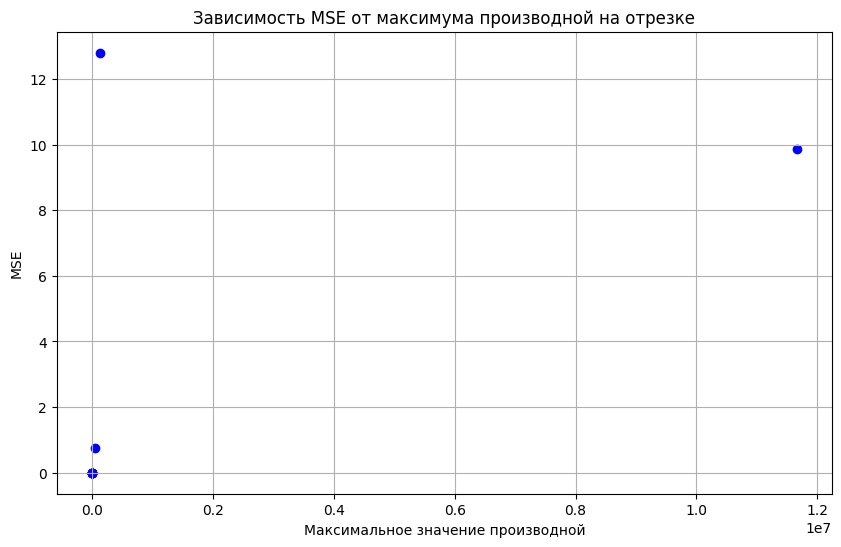

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Определение системы дифференциальных уравнений
def system(y, t, a, b, c, d):
    y1, y2 = y
    dy1_dt = a * y1 + b * y2
    dy2_dt = c * y1 + d * y2
    return [dy1_dt, dy2_dt]

# Функция для расчета MSE
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Определение модели NeuralODE для системы уравнений
def build_neural_ode_model_system():
    input_y = Input(shape=(2,))
    input_t = Input(shape=(1,))
    combined_input = Concatenate()([input_y, input_t])
    x = Dense(units=64, activation='relu')(combined_input)
    x = Dense(units=64, activation='relu')(x)
    x = Dense(units=64, activation='relu')(x)
    output_dy = Dense(units=2)(x)  # Предсказание производных dy1_dt и dy2_dt
    model = Model(inputs=[input_y, input_t], outputs=output_dy)
    return model

neural_ode_model_system = build_neural_ode_model_system()
neural_ode_model_system.compile(optimizer='adam', loss='mse')

# Функция для проведения одного эксперимента
def conduct_experiment(a, b, c, d, experiment_id, time_points):
    # Начальные условия для всех экспериментов
    y0 = [1.0, 2.0]

    # Решение системы уравнений и добавление шума к данным
    solution = odeint(system, y0, time_points, args=(a, b, c, d))
    noise = np.random.normal(0, 0.5, solution.shape)
    noisy_data = solution + noise

    # Подготовка данных для обучения
    X_train = [noisy_data, time_points.reshape(-1, 1)]
    y_train = solution

    # Обучение модели
    neural_ode_model_system.fit(X_train, y_train, epochs=200, verbose=1)

    # Предсказание производных
    predicted_derivatives = neural_ode_model_system.predict(X_train)

    # Анализ и визуализация результатов
    # Вывод результатов
    print(f"Эксперимент {experiment_id}:")
    print("Истинные параметры:", [a, b, c, d])
    
    # Визуализация
    plt.figure(figsize=(10, 8))

    # Подграфик для y1
    plt.subplot(2, 1, 1)
    plt.scatter(time_points, noisy_data[:, 0], label='Симулированные данные y1 с шумом', color='blue')
    plt.scatter(time_points, solution[:, 0], label='Входные данные y1', color='orange')
    plt.plot(time_points, solution[:, 0], label='Истинные данные y1', color='green')
    plt.plot(time_points, predicted_derivatives[:, 0], label='Предсказанные данные y1', color='red')
    plt.xlabel('Время')
    plt.ylabel('y1')
    plt.title(f"Результаты эксперимента {experiment_id} для y1")
    plt.legend()

    # Подграфик для y2
    plt.subplot(2, 1, 2)
    plt.scatter(time_points, noisy_data[:, 1], label='Симулированные данные y2 с шумом', color='blue')
    plt.scatter(time_points, solution[:, 1], label='Входные данные y2', color='orange')
    plt.plot(time_points, solution[:, 1], label='Истинные данные y2', color='green')
    plt.plot(time_points, predicted_derivatives[:, 1], label='Предсказанные данные y2', color='red')
    plt.xlabel('Время')
    plt.ylabel('y2')
    plt.title(f"Результаты эксперимента {experiment_id} для y2")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Расчёт MSE для предсказанных производных
    mse = calculate_mse(solution, predicted_derivatives)
    print("MSE:", mse)

    return solution, predicted_derivatives, mse
    
# Параметры экспериментов
experiment_params = [
(-2, 1, 3, -4), # Эксперимент 1
(-1, 2, -3, 4), # Эксперимент 2
(0.5, -1.5, 2, -2.5), # Эксперимент 3
(1, -1, 1.5, -1.5), # Эксперимент 4
(-2.5, 2.5, -0.5, 0.5), # Эксперимент 5
(2, -2, 3, -3), # Эксперимент 6
(-1.5, 1, 2.5, -2), # Эксперимент 7
(1.5, -1, -2, 2), # Эксперимент 8
(-3, 3, -1, 1), # Эксперимент 9
(2.5, -2.5, 0.5, -0.5) # Эксперимент 10
]

time_points = np.linspace(0, 5, 100)

# Переменные для хранения результатов
solutions = []
predicted_solutions = []
mse_values = []
max_derivatives = []

for i, params in enumerate(experiment_params, start=1):
    solution, predicted_solution, mse = conduct_experiment(*params, experiment_id=i, time_points=time_points)
    
    # Добавление результатов в массивы
    mse_values.append(mse)

    # Вычисление максимального значения производной для текущего решения
    dy1_dt = np.gradient(solution[:, 0], time_points)
    dy2_dt = np.gradient(solution[:, 1], time_points)
    max_derivative = max(np.max(np.abs(dy1_dt)), np.max(np.abs(dy2_dt)))
    max_derivatives.append(max_derivative)

# Убедитесь, что длины max_derivatives и mse_values совпадают
print("Длина max_derivatives:", len(max_derivatives))
print("Длина mse_values:", len(mse_values))

# Визуализация зависимости погрешности от максимального значения производной
plt.figure(figsize=(10, 6))
plt.scatter(max_derivatives, mse_values, color='blue')
plt.xlabel('Максимальное значение производной')
plt.ylabel('MSE')
plt.title('Зависимость MSE от максимума производной на отрезке')
plt.grid(True)
plt.show()